In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
import sympy as sy
from sympy.parsing.sympy_parser import parse_expr, stringify_expr
from sympy.parsing.sympy_parser import transformations, T

from sympy.utilities.lambdify import implemented_function, lambdify
from sympy import Eq
from sympy.abc import x, y

In [4]:
foo_str = "(sin(3πx))^2+(x-1)^2(1+(sin(3πy))^2)+(y-1)^2(1+(sin(2πy))^2)"

In [5]:
foo_str = foo_str.replace("π", "*3.14")
foo_str = foo_str.replace("y", "3")

In [6]:
foo = parse_expr(foo_str, transformations = T[:])

In [7]:
foo

(x - 1)**2*(sin(9429/1000)**2 + 1) + sin(471*x/50)**2 + 4*sin(3143/500)**2 + 4

In [8]:
foo_func = lambdify(sy.abc.x, foo, modules = 'math')
foo_func_vect = np.vectorize(foo_func)

In [9]:
foo_func(2)

5.000140828265327

Установим значения границ отрезка, точности вычисления глобального экстремума и шага вычисления значений функции (для отображения графиков)

In [10]:
accuracy = 0.001
a = -1
b = 2
step = 0.01

Приступим к реализации метода

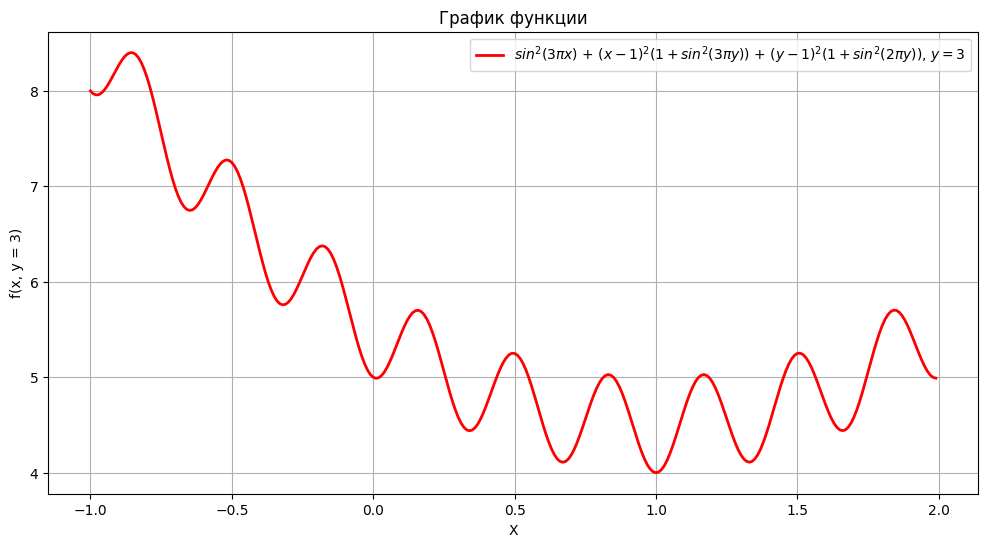

In [19]:
#Зададим область определения и область допустимых значений

x = np.arange(a, b, step)
z = foo_func_vect(x)

plt.figure(figsize=(12,6))
plt.title('График функции')
plt.plot(x, z, label = r'$sin^2(3πx)$ + $(x-1)^2(1+sin^2(3πy))$ + $(y-1)^2(1+sin^2(2πy))$, $y = 3$', linewidth = 2, color = 'red')
plt.xlabel('X')
plt.ylabel('f(x, y = 3)')
plt.grid()
plt.legend(loc = 'best')
plt.show();

In [20]:
#Найдём константу Липшица
def find_lipschitz_const(X, func):
    u = X[0]
    lip_const = -1
    w_u = func(u)
    for i in X[1:]:
        v = i
        w_v = func(v)
        temp_lip_const = abs(w_u - w_v) / abs(u - v)
        lip_const = max(lip_const, temp_lip_const)
        u = v
        w_u = w_v
    return lip_const

In [21]:
lip_const = find_lipschitz_const(x, foo_func_vect)
round(lip_const, 2)

12.88

In [22]:
# Код для получения ломанной
def get_broken_line(x, k, lip_const, func):
    g = func(k) - lip_const * np.abs(x-k)
    return g

# Код для метода Пиявского
def piyavski_method(foo_str, a, b, accuracy):
    #Произведём парсинг функции
    foo = parse_expr(foo_str, transformations = T[:])
    foo_func = lambdify(sy.abc.x, foo, modules = 'math')
    function = np.vectorize(foo_func)
    #Перейдём к реализации метода Пиявского
    x = np.arange(a, b, 0.01)
    lip_const = find_lipschitz_const(x, function)
    g_0 = get_broken_line(x, a, lip_const, function)
    g_1 = get_broken_line(x, b, lip_const, function)
    bl = np.maximum(g_0, g_1)
    x_min = x[np.nanargmin(bl)]

    for i in range(1000):
        x_min = x[np.nanargmin(bl)]
        y_min = min(bl)
        f_min = function(x_min)
        if accuracy >= abs(f_min-y_min):
            print(f'Минимум найден за: {i} итераций')
            break

        g = get_broken_line(x, x_min, lip_const, function)
        bl = np.maximum(g, bl)
    piyavski_method_visual(bl, x_min, y_min)
    return bl, x_min, y_min

# Код для визуализации метода
def piyavski_method_visual(broken_line, x_min, y_min):
    plt.figure(figsize=(18,10))
    plt.title('Нахождение локального минимума методом Пиявского\n', fontsize = 24)
    plt.plot(x, broken_line, label =r'Ломаная функция', linewidth=1, color= 'blue')
    plt.plot(x, z, label=r'$sin^2(3πx)$ + $(x-1)^2(1+sin^2(3πy))$ + $(y-1)^2(1+sin^2(2πy))$, $y = 3$',
             linewidth=2, color='red', alpha=0.4)
    plt.scatter(x_min, y_min, marker='x',color = 'red')
    plt.annotate(f"минимум миноранты ({round(x_min, 2)},{round(y_min, 2)})", (x_min,y_min),
            xytext=(x_min-0.1, y_min+2),
            arrowprops=dict(arrowstyle='->'))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.legend(loc='best')
    plt.show();

Минимум найден за: 41 итераций


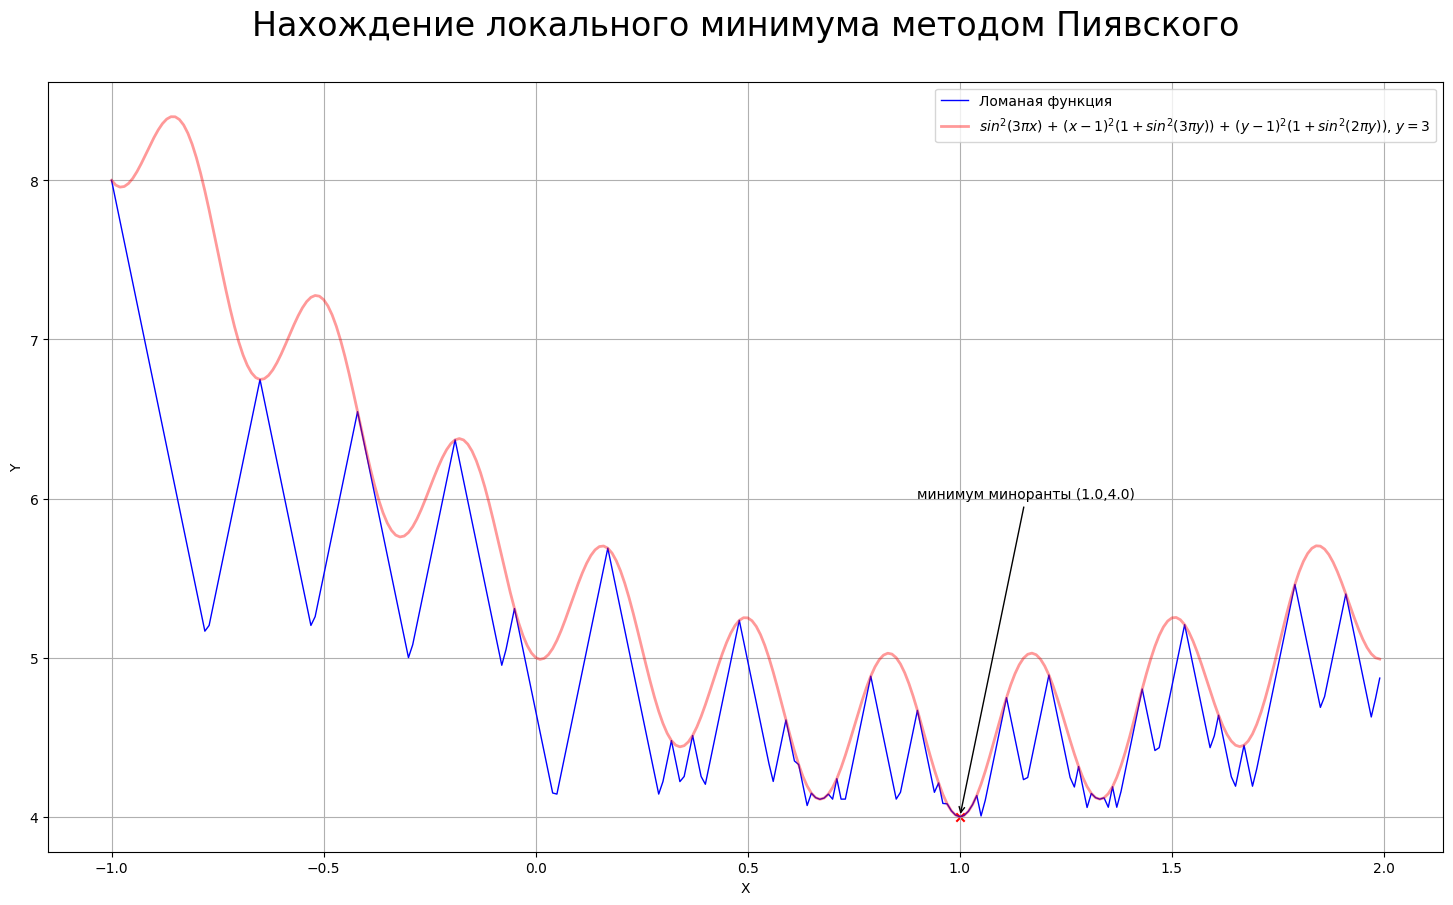

CPU times: total: 328 ms
Wall time: 316 ms


In [25]:
%%time
broken_line, x_min, y_min = piyavski_method(foo_str, a, b, accuracy)

In [18]:
round(x_min, 3), round(y_min, 3)

(1.0, 4.0)

![d](excel.png)